# Python Cheatsheets - DATA VISUALIZATION

### Matplotlib
Matplotlib is a Python package to create two-dimensional plots from data stored in a variety of data structures (i.e. lists, numpy arrays, pandas dataframes). It uses an object oriented approach for plotting to build plots step-by-step by adding new elements to the plot.

In [2]:
# import necessary libraries for plotting, pandas, and file reading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

Matplotlib provides many common plotting commands. Some of these plotting commands are shown below. For more types, please refer to the original matplotlib package sources (https://matplotlib.org/stable/plot_types).

#### 1) Line Plot 
A line plot is a simple plot joining straight lines connecting data points where the x-axis and y-axis values intersect.

- __Plot a List with a Line Plot:__

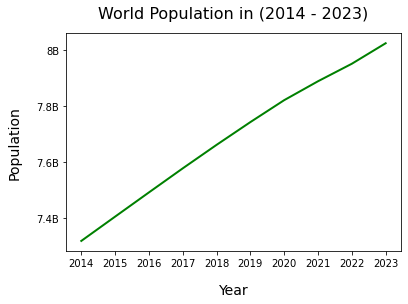

In [3]:
# Line Plot (world population extracted from https://databank.worldbank.org/)
file = open("data/world_population.csv", "r")
[year, pop] = list(csv.reader(file, delimiter=";"))
file.close()

pop = [int(i) for i in pop]
# Plot the data using preferred style (for detailed arguments: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
plt.plot(year, pop, color='green', linewidth=2.0)

# Customize plot labels
plt.title("World Population in (2014 - 2023)", pad=15, fontsize=16)
plt.xlabel('Year', labelpad=15, fontsize=14)
plt.ylabel('Population', labelpad=15, fontsize=14)

# Adapt the ticks on the y-axis
tick_val = [7400000000, 7600000000, 7800000000, 8000000000]
tick_lab = ['7.4B', '7.6B', '7.8B', '8B']
plt.yticks(tick_val, tick_lab)

# Customizations need to be completed before .show() to be visible
plt.show()

- __Plot a DataFrame by a Line Plot:__


<AxesSubplot:xlabel='Year', ylabel='Schooling (year)'>

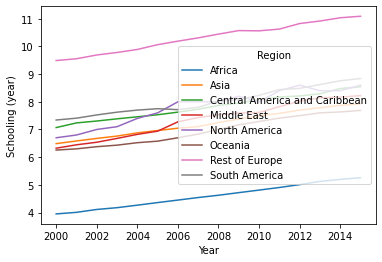

In [31]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing
developing_countries = world[world["Economy_status_Developing"] == 1]

# pivot schooling by year and region
schooling_by_region_year = developing_countries.pivot_table(index="Region", columns="Year", values="Schooling")

# create a line plot of the schooling (avg years that people aged 25+ spent in formal education) of developing countries by year
schooling_by_region_year.T.plot(kind="line", ylabel='Schooling (year)')


#### 2) Bar Plot 
A bar plot or bar chart presents comparison between categories, and represents the category of data with rectangular bars which lengths and heights are proportional to the values they represent. The bar plots can be plotted horizontally or vertically.

- __Plot a List with a Line Plot:__

- __Plot a DataFrame by a Bar Plot:__

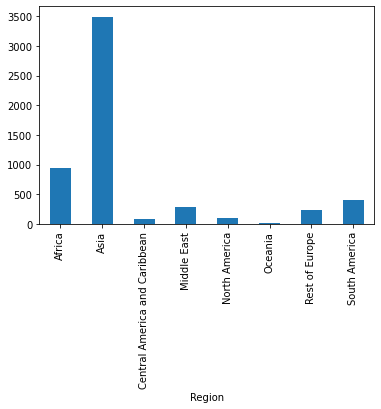

In [7]:
# read the csv file (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
#world = pd.read_csv('data/world_development.csv', index_col=0)

# subset the rows where the economy status is developing and drop duplicate countries
developing_countries = world[world["Economy_status_Developing"] == 1].drop_duplicates(subset="Country")

# group by region and get the sum of the population
pop_by_region = developing_countries.groupby("Region")["Population_mln"].sum()

# create a bar plot of the total population of developing countries by region
pop_by_region.plot(kind="bar")

# show the plot
plt.show()

#### 3) Scatter Plot 
A scatter plot is more suitable in cases such as assessing a correlation between two variables rather than observing a time data.

- __Plot a List with a Scatter Plot:__

In [4]:
# Scatter Plot (data extraxted from https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)
file = open("data/life_expectancy.csv", "r")
table = list(csv.reader(file, delimiter=";"))
file.close()

Read the necessary columns from the data for demonstration and plot customization.

In [5]:
# Get the related data for plotting (easier and faster with pandas, this is only for demonstration)
gdp_cap = [float(i[13]) for i in table[1:] if int(i[2])==2000]
life_exp = [float(i[20]) for i in table[1:] if int(i[2])==2000]

# Get the population and store as a numpy array to create different sized bubles
pop = [float(i[14]) for i in table[1:] if int(i[2])==2000]
np_pop = np.array(pop)

# Get the region and store as an array to match with colors using a dictionary
region = [i[1] for i in table[1:] if int(i[2])==2000]
dict = {
    'Africa':'red',
    'Asia':'purple',
    'Central America and Caribbean':'magenta',
    'European Union':'blue',
    'Middle East':'black',
    'North America':'green',
    'Oceania':'brown',
    'Rest of Europe':'navy',
    'South America':'orange'
}
col = [*map(dict.get, region)]

Plot the data using the data elements and preferred customizationsç

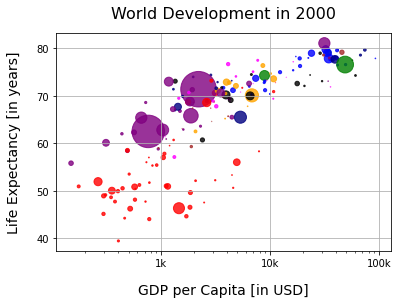

In [6]:
# Change the line plot below to a scatter plot
plt.scatter(gdp_cap, life_exp, s = np_pop, c = col, alpha = 0.8)

# Put the x-axis on a logarithmic scale
plt.xscale('log')

# Customize plot labels
plt.title("World Development in 2000", pad=15, fontsize=16)
plt.xlabel('GDP per Capita [in USD]', labelpad=15, fontsize=14)
plt.ylabel('Life Expectancy [in years]', labelpad=15, fontsize=14)

# Adapt the ticks on the x-axis
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val, tick_lab)

# Add grid() call for a plot with grid
plt.grid(True)

plt.show()

- __Plot a DataFrame with a Scatter Plot:__

#### 4) Histogram 
A histogram divides data into bins and counts the number of data points in each bin, where the height of each bar represents the count of data points within that bin. It is useful to explore the data and get an idea about the distribution. If not specified, by default Python sets the number of bins to 10. Too few bins will oversimplify, while too many bins will overcomplicate the reality.

- __Plot a List with a Histogram:__

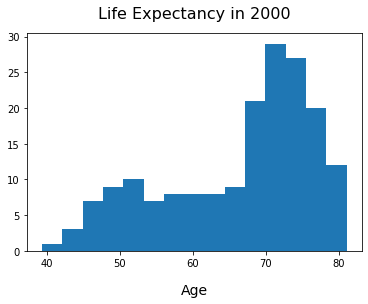

In [88]:
# Use the same life expectancy data and plot histogram with 15 bins
plt.hist(life_exp, 15)

# Show plot
plt.title("Life Expectancy in 2000", pad=15, fontsize=16)
plt.xlabel('Age', labelpad=15, fontsize=14)
plt.show()

# To clear the plot if necessary
#plt.clf() 

- __Plot a DataFrame with a Histogram:__